In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import metrics
from numpy.linalg import pinv
from matplotlib import pyplot as plt
import xgboost as xgb
from sklearn.linear_model import SGDRegressor, LinearRegression

In [2]:
data = pd.read_csv('viscosityData.csv', index_col=0)
data.head(3)

,DES,T/K,V/cP,MCI,Avg Molar,omega
0,DES2,293.15,0.0489,0.051962,87.66,1.7208
1,DES2,293.85,0.0479,0.050127,87.66,1.7208
2,DES2,294.65,0.0459,0.048136,87.66,1.7208


In [55]:
'''
T/k inverse with V/cp
MCI direct with V/cp
'''
data.dropna(axis=1,inplace=True)

In [3]:
data.drop(data.columns[:1],axis=1,inplace=True)
data.head(3)

# Interaction Term (Hypothesis test)
# Normalise first

,T/K,V/cP,MCI,Avg Molar,omega
0,293.15,0.0489,0.051962,87.66,1.7208
1,293.85,0.0479,0.050127,87.66,1.7208
2,294.65,0.0459,0.048136,87.66,1.7208


In [4]:
viscosity = list(data.iloc[:,1])
len(viscosity) == data.shape[0]

True

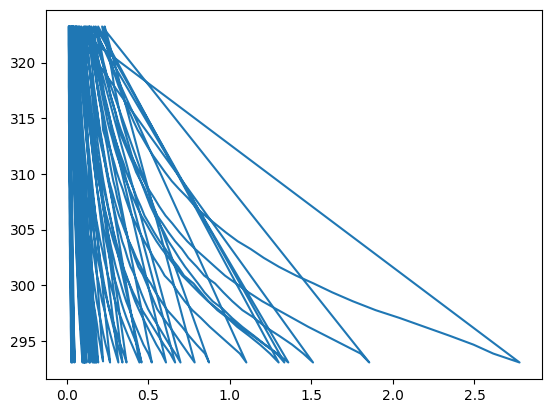

In [5]:
# Relation with Temperature:
temperature = list(data.iloc[:,0])

# Temperature inverse relation with viscosity
plt.plot(viscosity,temperature)

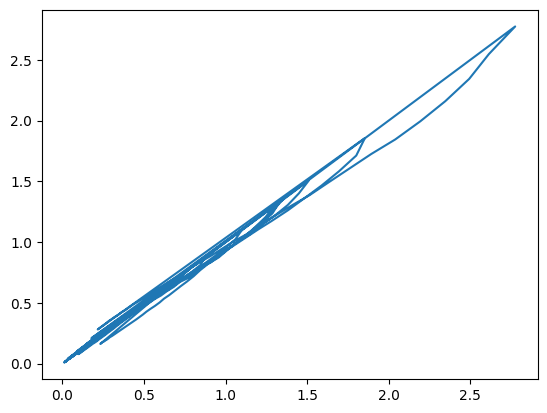

In [6]:
# Relation with Temperature:
MCI = list(data.iloc[:,2])

# MCI linear relation with viscosity
plt.plot(viscosity,MCI)

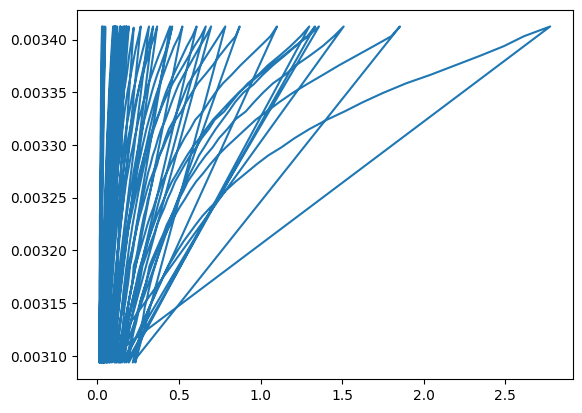

In [7]:
from matplotlib import pyplot as plt

# Relation with Temperature:
temperature = np.array(list(data.iloc[:,0]))
temp_inv = 1 / temperature
# Temperature inverse relation with viscosity
plt.plot(viscosity,temp_inv)

In [8]:
data['inv_Temp'] = temp_inv

In [62]:
# X = data[['T/K','MCI','Avg Molar',' omega']]
# y = data['V/cP']
# print(X.shape, y.shape)

In [63]:
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
# y_test = y_test.to_numpy()

In [64]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

# objectives = ['reg:gamma', 'reg:squarederror', 'reg:squaredlogerror', 'reg:tweedie', 'reg:pseudohubererror']

# for obj in objectives:
#     params = {
#         'objective': obj,
#         'eval_metric': 'mape',
#         'seed': 42
#     }

#     model = xgb.train(params, dtrain, 1000)
#     pred = model.predict(dtest)

#     sum = 0
#     for i in range(len(pred)):
#         sum += abs(pred[i] - y_test[i]) / y_test[i]
#     mape = sum / len(y_test)
#     print(f'\nObjective: {obj}')
#     print(f'MAPE: {mape*100}')
#     print(f'Accuracy: {(1 - mape)*100}\n')

In [65]:
# dtrain = xgb.DMatrix(X_train, label=y_train)
# dtest = xgb.DMatrix(X_test, label=y_test)

# params = {
#     'objective': 'reg:gamma',
#     'eval_metric': 'mae',             # Mean Absolute Error
#     'seed': 42
# }

# model = xgb.train(params, dtrain, 100)
# pred = model.predict(dtest)

# sum = 0
# for i in range(len(pred)):
#     sum += abs(pred[i] - y_test[i]) / y_test[i]
# mape = sum / len(y_test)
# print(f'MAPE: {mape*100}')
# print(f'Accuracy: {(1 - mape)*100}')

## Inverse of Temperature

In [12]:
X = data[['inv_Temp','MCI','Avg Molar',' omega']]
y = data['V/cP']
print(X.shape, y.shape)

(1600, 4) (1600,)


In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)
y_test = y_test.to_numpy()

In [14]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

objectives = ['reg:gamma', 'reg:squarederror', 'reg:squaredlogerror', 'reg:tweedie', 'reg:pseudohubererror']

for obj in objectives:
    params = {
        'objective': obj,
        'eval_metric': 'mape',
        'seed': 42
    }

    model = xgb.train(params, dtrain, 1000)
    pred = model.predict(dtest)

    sum = 0
    for i in range(len(pred)):
        sum += abs(pred[i] - y_test[i]) / y_test[i]
    mape = sum / len(y_test)
    print(f'\nObjective: {obj}')
    print(f'MAPE: {mape*100}')
    print(f'Accuracy: {(1 - mape)*100}\n')


Objective: reg:gamma
MAPE: 1.7924286497482917
Accuracy: 98.20757135025171


Objective: reg:squarederror
MAPE: 2.2048859041749496
Accuracy: 97.79511409582506


Objective: reg:squaredlogerror
MAPE: 2.025015206596869
Accuracy: 97.97498479340312


Objective: reg:tweedie
MAPE: 1.6663222386821421
Accuracy: 98.33367776131786


Objective: reg:pseudohubererror
MAPE: 2.086987817609941
Accuracy: 97.91301218239006



In [69]:
dtrain = xgb.DMatrix(X_train, label=y_train)
dtest = xgb.DMatrix(X_test, label=y_test)

eval_metric = ["rmse","rmsle","mae"]
objectives = ['reg:gamma', 'reg:squarederror', 'reg:squaredlogerror', 'reg:tweedie', 'reg:pseudohubererror','reg:absoluteerror']

for obj in objectives:
        print("Objective : "+obj)
        for i in eval_metric:

                params = {
                'objective': obj,
                'eval_metric': i,
                'seed': 42
                }


                model = xgb.train(params, dtrain, 1000)
                pred = model.predict(dtest)

                if i =="rmse":
                        sum = 0
                        for j in range(len(pred)):
                                sum += (pred[j] - y_test[j])**2
                        sum/=len(pred)
                        sum=(sum)**(0.5)
                        sum = round(sum,6)
                        print("RMSE")
                        print(f'Error:{sum*100}')
                        print(f'Accuracy: {(1 - sum)*100}')
                        
                elif i == "rmsle":
        
                        n = len(y_test)
                        msle = round(np.sqrt(np.mean(np.square(np.log1p(pred) - np.log1p(y_test)))),6)
                        print("RMSLE")
                        print(f'Error:{msle*100}')
                        print(f'Accuracy: {(1 - msle)*100}')
        
                elif i == "mae":
                        sum = 0
                        for i in range(len(pred)):
                                sum += abs(pred[i] - y_test[i]) / y_test[i]
                        mape = round(sum / len(y_test),6)
                        print("MAE")
                        print(f'Error: {mape*100}')
                        print(f'Accuracy: {(1 - mape)*100}\n') 


                                        

Objective : reg:gamma
RMSE
Error:2.3855999999999997
Accuracy: 97.6144
RMSLE
Error:0.8044000000000001
Accuracy: 99.1956
MAE
Error: 1.7924
Accuracy: 98.2076

Objective : reg:squarederror
RMSE
Error:1.9882
Accuracy: 98.01180000000001
RMSLE
Error:0.7234
Accuracy: 99.2766
MAE
Error: 2.2049
Accuracy: 97.7951

Objective : reg:squaredlogerror
RMSE
Error:3.3398
Accuracy: 96.6602
RMSLE
Error:1.2679
Accuracy: 98.7321
MAE
Error: 2.025
Accuracy: 97.975

Objective : reg:tweedie
RMSE
Error:2.0783
Accuracy: 97.9217
RMSLE
Error:0.7529
Accuracy: 99.2471
MAE
Error: 1.6663000000000001
Accuracy: 98.33370000000001

Objective : reg:pseudohubererror
RMSE
Error:2.2913
Accuracy: 97.70870000000001
RMSLE
Error:0.8495
Accuracy: 99.1505
MAE
Error: 2.0869999999999997
Accuracy: 97.91300000000001

Objective : reg:absoluteerror
RMSE
Error:13.0078
Accuracy: 86.9922
RMSLE
Error:9.6917
Accuracy: 90.3083
MAE
Error: 106.5427
Accuracy: -6.54269999999999



In [70]:
X_train=np.array(X_train)
y_train  = np.array(y_train)

In [73]:
from sklearn.model_selection import KFold
kf = KFold(n_splits=5)

scores = []
for train_index, test_index in kf.split(X_train):
    x_train, x_test = X_train[train_index], X_train[test_index]
    ytrain, ytest = y_train[train_index], y_train[test_index]

    dtrain = xgb.DMatrix(x_train, label=ytrain)
    dtest = xgb.DMatrix(x_test, label=ytest)

    params = {
                'objective':  "reg:gamma",
                'eval_metric': "mape",
                'seed': 42
            }
    
    model = xgb.train(params, dtrain, 1000)
    pred = model.predict(dtest)

    sum = 0
    for i in range(len(pred)):
        sum += abs(pred[i] - y_test[i]) / y_test[i]
    mape = sum / len(y_test)
    
    scores.append(mape)

avg = np.mean(np.array(scores))

print(f'Error: {avg*100}')
print(f'Accuracy: {(1 - avg)*100}\n') 


Error: 209.64342276130674
Accuracy: -109.64342276130674

